## Credit Card Fraud Detection Project

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from flask import Flask, request, jsonify
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# Setting styles
sns.set(style="whitegrid")

### Loading the Dataset

In [2]:
df = pd.read_csv("creditcard_2023.csv")

# Displaying the first 5 rows
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

### Exploratory Data Analysis (EDA)

In [3]:
print("Dataset shape:", df.shape)

# Showing the first 5 rows
df.head()

Dataset shape: (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
# Dataset info: column types, nulls
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Class distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64
Percentage of fraud transactions: 50.0000%


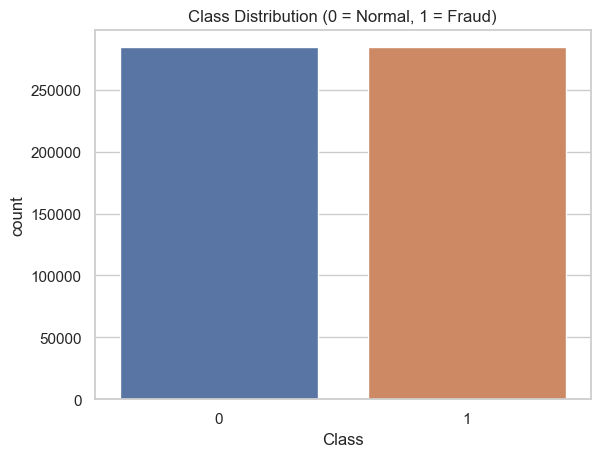

In [5]:
# Count of normal (0) and fraud (1) transactions
class_counts = df['Class'].value_counts()
print("Class distribution:\n", class_counts)

# Percentage of fraud cases
fraud_percentage = class_counts[1] / class_counts.sum() * 100
print(f"Percentage of fraud transactions: {fraud_percentage:.4f}%")

# Plotting class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

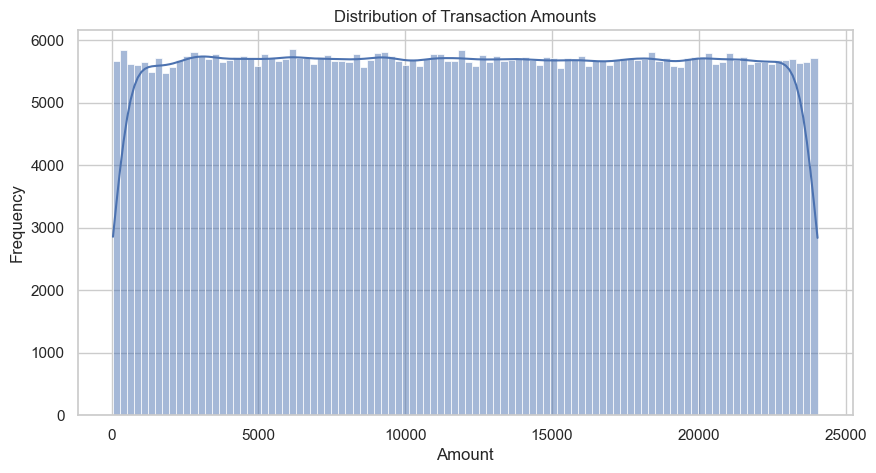

In [6]:
# Histogram of transaction amounts
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

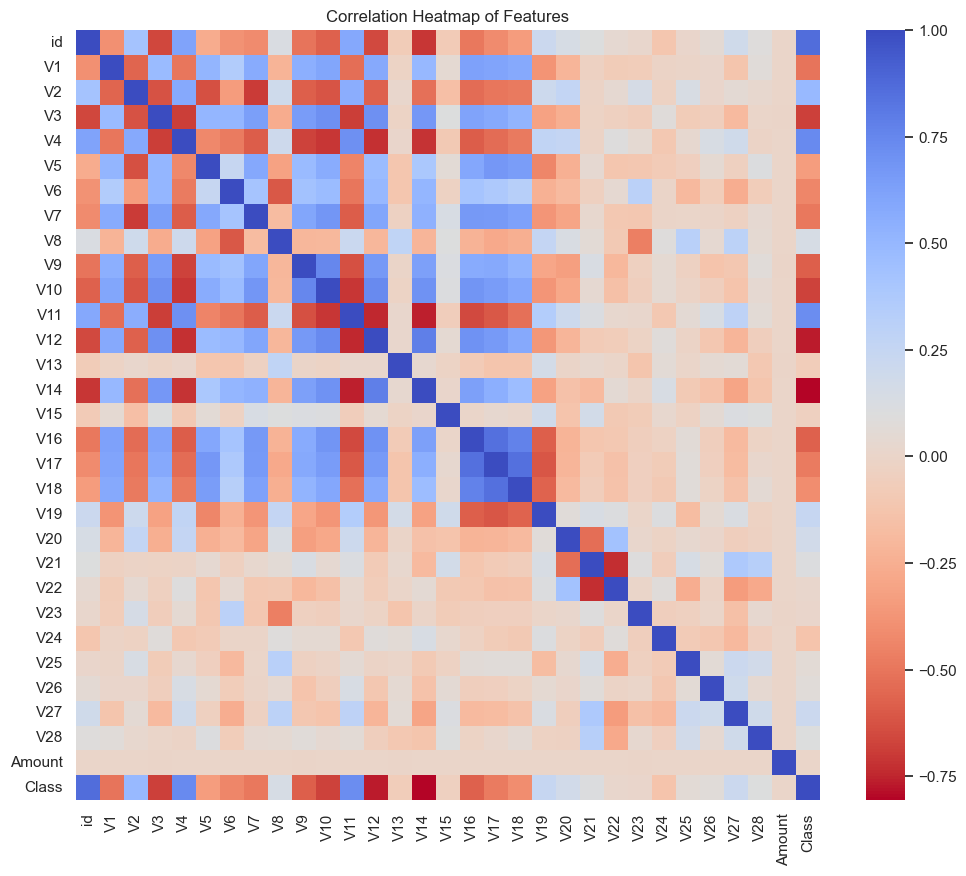

In [7]:
# Computing correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

### Data Preprocessing

#### Feature Scaling (Standardizing Amount)

In [8]:
print(df.columns)

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

#### Handling Class Imbalance with SMOTE (Synthetic Oversampling)

In [10]:
# Step 1: Splitting the original dataset
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [11]:
# Step 2: Applying SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
# Step 3: Scaling only 'V' columns in both train and test
columns_to_scale = [col for col in X_train_resampled.columns if col.startswith('V') or col == 'Amount']

scaler = StandardScaler()
X_train_resampled[columns_to_scale] = scaler.fit_transform(X_train_resampled[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [13]:
# Step 4: Saving the scaler for use in the Flask app
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [14]:
# Checking for new class distribution
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())

Class distribution after SMOTE:
 Class
0    227452
1    227452
Name: count, dtype: int64


In [15]:
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train_resampled shape: (454904, 30)
y_train_resampled shape: (454904,)
X_test shape: (113726, 30)
y_test shape: (113726,)


#### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver='liblinear',       # or 'saga'
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42,
                   solver='liblinear')

In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=skf, scoring='roc_auc')

print("StratifiedKFold ROC AUC scores:", scores)
print("Mean AUC:", scores.mean())

StratifiedKFold ROC AUC scores: [0.99906053 0.99900765 0.9988199  0.99892865 0.99920133]
Mean AUC: 0.999003611856448


#### Evaluation on the test set

In [18]:
print(y_test.value_counts())

Class
1    56863
0    56863
Name: count, dtype: int64


In [19]:
y_proba = model.predict_proba(X_test)[:, 1]

# Calculating precision, recall, and thresholds for the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Finding threshold where precision and recall are balanced (maximize F1 score)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

# Printing the best F1 score and threshold
print("Best F1 Score:", f1_scores[best_index])
print("Best Threshold:", best_threshold)

# Using the best threshold to classify predictions
y_pred_best = (y_proba >= best_threshold).astype(int)

# Evaluating the performance using confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best F1 Score: 0.999181575774643
Best Threshold: 0.7009459436150675
[[56863     0]
 [   93 56770]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



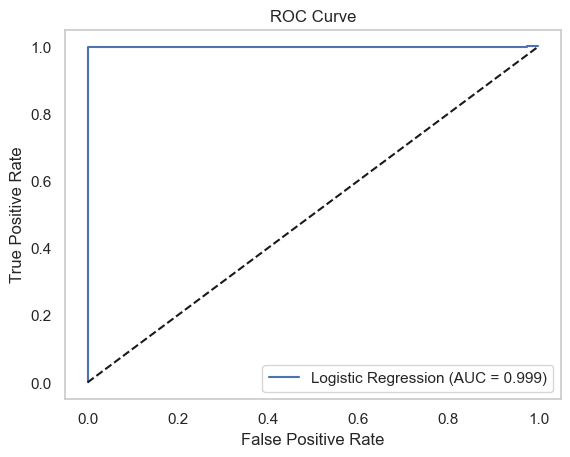

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

#### Training and evaluating other models

##### Random Forest

In [21]:
# Training
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting probabilities
y_rf_proba = rf.predict_proba(X_test)[:, 1]

# Applying best threshold
y_rf_pred = (y_rf_proba >= best_threshold).astype(int)

# Evaluation
print("Random Forest Evaluation")
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))
print("ROC AUC:", roc_auc_score(y_test, y_rf_proba))

Random Forest Evaluation
[[56861     2]
 [   26 56837]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC: 0.9999800176332548


##### XGBoost

In [22]:
# Training
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1, random_state=42)
xgb.fit(X_train, y_train)

# Predicting probabilities
y_xgb_proba = xgb.predict_proba(X_test)[:, 1]

# Apply threshold
y_xgb_pred = (y_xgb_proba >= best_threshold).astype(int)

# Evaluation
print("XGBoost Evaluation")
print(confusion_matrix(y_test, y_xgb_pred))
print(classification_report(y_test, y_xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, y_xgb_proba))

XGBoost Evaluation
[[56856     7]
 [   23 56840]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC: 0.9999694178027828


#### Hyperparameter Tuning with GridSearchCV

In [23]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Initializing the base model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#### Ensemble Models

In [24]:
# 1. Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Defining models (increasing max_iter to avoid convergence warning)
log_clf = LogisticRegression(max_iter=5000)
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf_clf)
], voting='soft')

# 4. Fitting the model
voting_clf.fit(X_train_scaled, y_train)

# 5. Predicting and evaluating
y_pred = voting_clf.predict(X_test_scaled)
y_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[56846    17]
 [   33 56830]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC: 0.9999953924672306


In [25]:
# Predicting probabilities using the trained logistic regression model
y_log_reg_proba = model.predict_proba(X_test)[:, 1]  

# Defining the threshold (e.g., from precision-recall curve or default 0.5)
best_threshold = 0.5  

# Making final class predictions
y_log_reg_pred = (y_log_reg_proba >= best_threshold).astype(int)

In [26]:
print("Predicted labels count:", np.bincount(y_log_reg_pred))

Predicted labels count: [     0 113726]


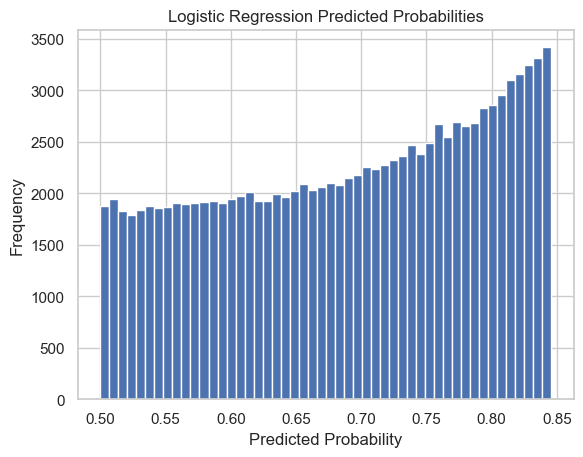

In [27]:
import matplotlib.pyplot as plt

plt.hist(y_log_reg_proba, bins=50)
plt.title("Logistic Regression Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

In [28]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_log_reg_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

print("Best threshold based on F1 score:", best_threshold)

# Predicting using best threshold
y_log_reg_pred = (y_log_reg_proba >= best_threshold).astype(int)

Best threshold based on F1 score: 0.7009459436150675


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Using the best threshold to generate predicted labels
y_log_reg_pred = (y_log_reg_proba >= best_threshold).astype(int)

# Printing evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_log_reg_pred))

print("\nClassification Report (Logistic Regression with Best Threshold):")
print(classification_report(y_test, y_log_reg_pred, zero_division=0))

# Optional: Comparing fraud vs non-fraud prediction counts
import numpy as np
unique, counts = np.unique(y_log_reg_pred, return_counts=True)
print("\nPredicted labels count:", dict(zip(unique, counts)))

Confusion Matrix:
[[56863     0]
 [   93 56770]]

Classification Report (Logistic Regression with Best Threshold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Predicted labels count: {0: 56956, 1: 56770}


In [30]:
# Example evaluation of multiple models
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_log_reg_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_xgb_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg     

#### Saving the trained model

In [31]:
# Saving the trained model
joblib.dump(best_rf, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']

#### Loading the saved model

In [3]:
model = joblib.load(r'C:\Users\HP\Documents\Projects\creditcard_2023.csv\fraud_detection_model.pkl') 

In [4]:
scaler = joblib.load('scaler.joblib')

### Exporting CSV for Power BI

In [34]:
# Loading the dataset
df = pd.read_csv("creditcard_2023.csv")

# Separating features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Reloading the scaler and model
scaler = joblib.load("scaler.joblib")
model = joblib.load("fraud_detection_model.pkl")

# Selecting columns used during training
columns_to_scale = [col for col in X.columns if col.startswith('V') or col == 'Amount']
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.transform(X[columns_to_scale])


In [35]:
# Predicting probabilities and labels
y_proba = model.predict_proba(X_scaled)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)  

In [36]:
# Adding predictions to a new DataFrame
df_export = X.copy()
df_export['True_Label'] = y
df_export['Predicted_Probability'] = y_proba
df_export['Predicted_Label'] = y_pred

# Exporting to CSV
df_export.to_csv("fraud_powerbi_export.csv", index=False)
print("✅ Saved to fraud_powerbi_export.csv")

✅ Saved to fraud_powerbi_export.csv
